Things to do: <br>
    1. Get Data <br>
    2. Merge dataframe<br>
    3. Normalisasi data <br>
    4. Visualize Lineplot (Seperated)<br>
    5. Visualize ScatterPlot <br>
    6. Visualize Lineplot (per month)<br>


# Get Data

In [2]:
import pandas as pd

SBUX = pd.read_csv('dataset_clean\\clean_stock_SBUX_ytd', sep=';')
SBUX['Date'] = pd.to_datetime(SBUX['Date'])
SBUX.set_index('Date', inplace= True)
SBUX.head(10)

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420
2023-01-10,102.215449,104.242911,102.029351,103.821747,4183600,1.606298
2023-01-11,103.635649,104.252708,102.705174,104.115585,5634400,0.479936
2023-01-12,104.105780,104.252700,103.008793,103.674820,4882000,-0.430961
2023-01-13,102.910865,105.095043,102.910865,105.026482,5529700,2.115617


In [3]:
MCD = pd.read_csv('dataset_clean\\clean_stock_MCD_ytd', sep=';')
MCD['Date'] = pd.to_datetime(MCD['Date'])
MCD.set_index('Date', inplace=True)
MCD.head(10)

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364
2023-01-10,262.633775,264.719258,262.614081,264.532349,1718400,1.898574
2023-01-11,265.132393,265.348813,262.614071,264.433960,2391400,-0.698433
2023-01-12,265.112702,265.525878,261.856589,262.348450,1933000,-2.764252
2023-01-13,262.053363,264.571686,261.551656,264.512665,2168900,2.459302


# Merge DataFrame

In [4]:
SBUX_MCD = SBUX.merge(MCD, how= 'inner',left_index= True, right_index= True,suffixes=('_SBUX', '_MCD' ))
SBUX_MCD.head()

,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
Date,,,,,,,,,,,,
2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


# Normalize Data

In [5]:
from sklearn.preprocessing import MinMaxScaler

column_to_scale = SBUX_MCD.columns[0:4].append(SBUX_MCD.columns[6:10])

scaler = MinMaxScaler(feature_range= (0,1))
SBUX_MCD[column_to_scale] = scaler.fit_transform(SBUX_MCD[column_to_scale])

SBUX_MCD.head()

,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
Date,,,,,,,,,,,,
2023-01-03,0.390327,0.368752,0.366609,0.410773,6607700,0.264456,0.251530,0.229603,0.199026,0.273325,2743800,0.786965
2023-01-04,0.479863,0.519689,0.493679,0.560304,8166600,1.733624,0.305718,0.273824,0.268280,0.274491,2584100,-1.829706
2023-01-05,0.555527,0.535376,0.532460,0.559068,5575100,-0.058765,0.276034,0.237844,0.237341,0.231158,1945600,-2.557680
2023-01-06,0.592939,0.615932,0.595171,0.652165,9644100,1.283085,0.256112,0.340962,0.278525,0.373205,2855400,5.617037
2023-01-09,0.640860,0.602365,0.571241,0.571838,10124800,-1.743420,0.379033,0.342168,0.347780,0.330066,2654600,-2.636364


In [6]:
SBUX_MCD.describe()

,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
count,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000
mean,0.452282,0.441327,0.438734,0.461724,6.355817e+06,0.032346,0.587727,0.585635,0.589336,0.584631,2.665345e+06,-0.054018
std,0.201063,0.207887,0.198137,0.203591,2.891358e+06,1.047950,0.274075,0.272167,0.284485,0.265868,8.245915e+05,2.260153
min,0.000000,0.000000,0.000000,0.000000,1.595892e+06,-5.039917,0.000000,0.000000,0.000000,0.000000,1.450200e+06,-7.348395
25%,0.319196,0.299195,0.302833,0.329201,4.783450e+06,-0.559658,0.330049,0.341112,0.320272,0.347355,2.105450e+06,-1.460210
50%,0.465044,0.442987,0.446671,0.459997,5.630950e+06,0.029835,0.646245,0.642838,0.657642,0.641723,2.537350e+06,0.019882
75%,0.619255,0.599979,0.591429,0.619303,6.871775e+06,0.733469,0.835979,0.834334,0.852079,0.827100,2.937775e+06,1.344017
max,1.000000,1.000000,1.000000,1.000000,2.438860e+07,2.799599,1.000000,1.000000,1.000000,1.000000,6.305100e+06,8.204227


# Visualize Starbucks and MCD

## Line Plot

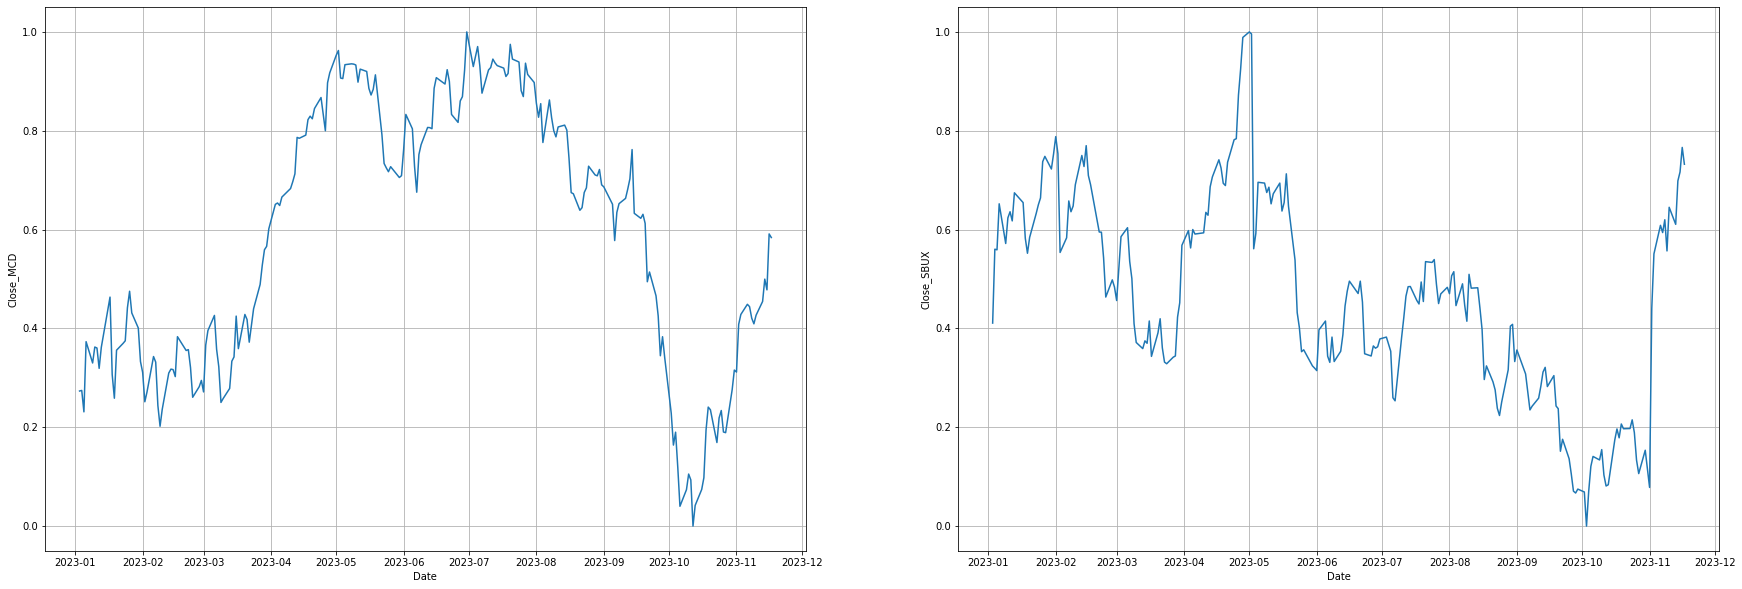

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize = (30,10))

plt.subplot(1,2,1)
sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_MCD'])
plt.grid()

plt.subplot(1,2,2)
sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_SBUX'])
plt.grid()

plt.show()

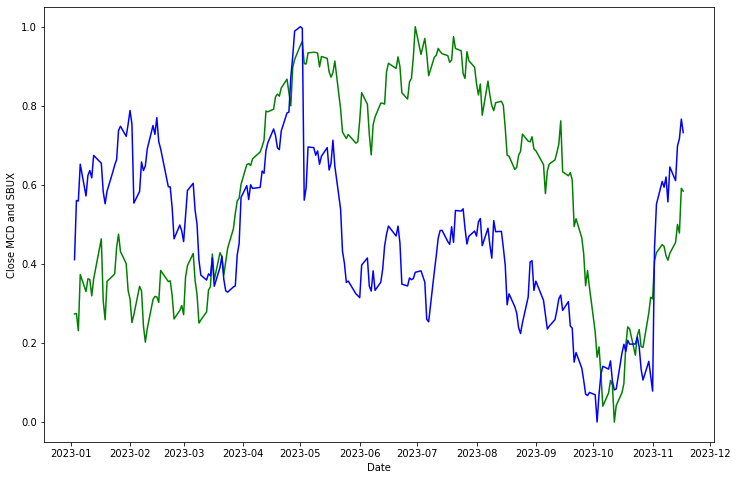

In [8]:
plt.figure(figsize=(12,8))

sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_MCD'], color= 'green')
sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Close_SBUX'],color= 'blue')

plt.ylabel('Close MCD and SBUX')
plt.show()

## Scatterplot

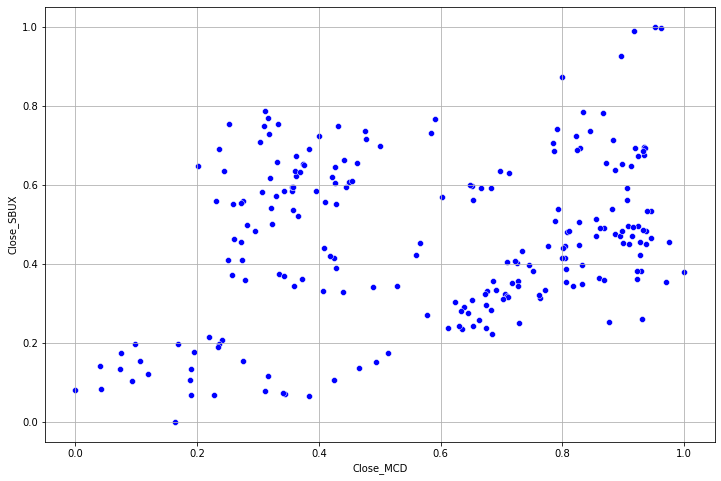

In [9]:
plt.figure(figsize=(12,8))

sns.scatterplot(data= SBUX_MCD, x='Close_MCD', y= 'Close_SBUX', color='blue')

plt.grid()
plt.show()

# Visualize SBUX and MCD (per Month)

In [10]:
Jan_Feb = SBUX_MCD.loc['2023-01-01':'2023-02-28']
Mar_April = SBUX_MCD.loc['2023-03-01':'2023-04-30']
May_June = SBUX_MCD.loc['2023-05-01':'2023-06-30']
Jul_Aug = SBUX_MCD.loc['2023-07-01':'2023-08-31']
Sep_Oct = SBUX_MCD.loc['2023-09-01':'2023-10-31']
Nov_Des = SBUX_MCD.loc['2023-11-01':'2023-12-31']

## LinePlot

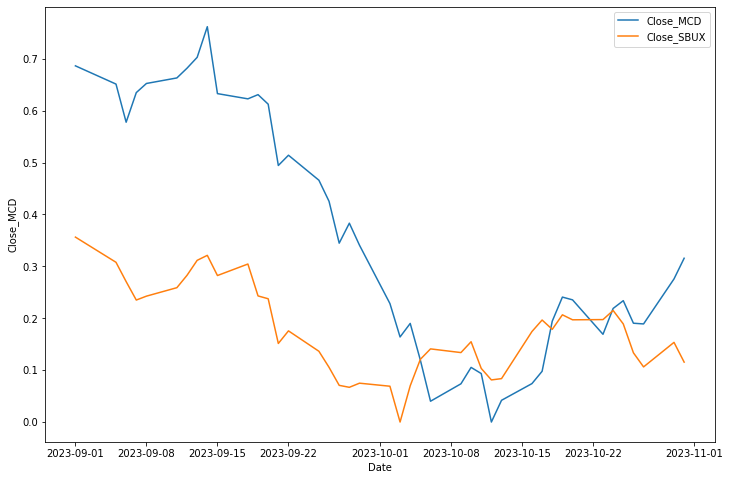

In [11]:
plt.figure(figsize=(12,8))

sns.lineplot(x=Sep_Oct.index, y= Sep_Oct['Close_MCD'], label= 'Close_MCD')
sns.lineplot(x=Sep_Oct.index, y= Sep_Oct['Close_SBUX'], label = 'Close_SBUX')

plt.show()


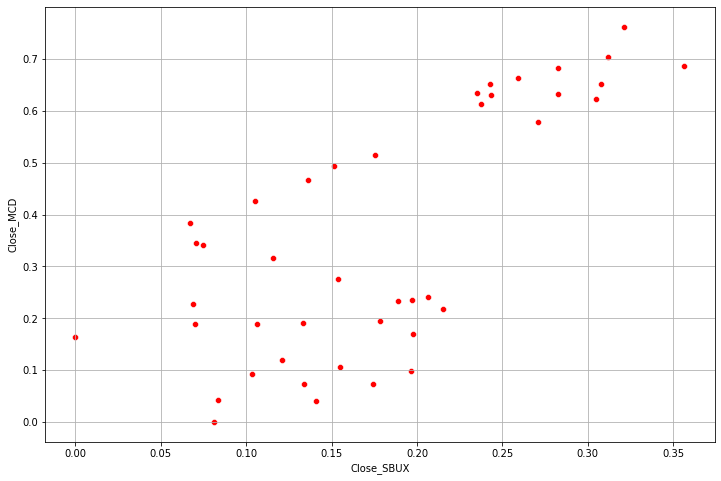

In [12]:
plt.figure(figsize=(12,8))

sns.scatterplot(data= Sep_Oct, x=Sep_Oct['Close_SBUX'], y='Close_MCD', color= 'red')

plt.grid()
plt.show()

# Correlation 

In [13]:

corr_list= []
for lagged in range(-10,11):
    correlation= Sep_Oct['Close_MCD'].corr(Sep_Oct['Close_SBUX'].shift(lagged))
    corr_list.append(correlation)

corr_list= [round(item,2) for item in corr_list]

for index, value in enumerate(corr_list):
    print(f'Lagged {index} days, with correlation {value}')

Lagged 0 days, with correlation -0.26
Lagged 1 days, with correlation -0.17
Lagged 2 days, with correlation -0.03
Lagged 3 days, with correlation 0.07
Lagged 4 days, with correlation 0.17
Lagged 5 days, with correlation 0.27
Lagged 6 days, with correlation 0.39
Lagged 7 days, with correlation 0.46
Lagged 8 days, with correlation 0.55
Lagged 9 days, with correlation 0.64
Lagged 10 days, with correlation 0.73
Lagged 11 days, with correlation 0.75
Lagged 12 days, with correlation 0.77
Lagged 13 days, with correlation 0.81
Lagged 14 days, with correlation 0.82
Lagged 15 days, with correlation 0.82
Lagged 16 days, with correlation 0.85
Lagged 17 days, with correlation 0.87
Lagged 18 days, with correlation 0.85
Lagged 19 days, with correlation 0.81
Lagged 20 days, with correlation 0.76
